# 영화 1주차 관객수 예측


* 구전효과를 무시하기위해 1주차 관객수를 선택 
* 한국영화만 선정(외국 배급사, 배우, 감독점수 산출에 문제)



### 차례
* 데이터수집
* 탐색적 자료 분석
* 예측모형

# 데이터 수집: ( 영화진흥원, 네이버영화 )에서 크롤링 
 
 ## 데이터 통합  
   - 2014년 7월 ~ 16년 8월 자료통합
     
 
 ## 변수변환
 * 카테고리의 값을 리얼넘버로 변환
         - 주연배우 : 주연배우 3명을 뽑아 1위부터 100위까지 각각 3명씩 100점~ 1점으로 점수를 매겨 합으로 계산(역대한국영화Top100영화에서)
         - 감독    : 1위부터 100위까지 각각 100점~ 1점으로 점수를 매겨 합으로 계산(역대한국영화Top100영화에서)
         - 배급사   : 배급사가 있을경우 1 없을 경우 0 합으로 계산(역대한국영화Top100영화에서)
         - 장르    : 장르가 있을경우 1 없을경우 0(전체 데이터에서)
         - 등급    : 전체관람가/12세이상관람가/15세/청불 에 따라 각 해당하는 곳에 1넣어줌(전체 데이터에서)
 * 마케팅효과
         - 사전평점, 평가자수, 보고싶어요 수 : 네이버에서 크롤링

## 탐색적 자료 분석 
    
    * 원자료       =    영화 정보(개봉전 스크린수, 등급, 감독) +  마케팅효과(좋아요, 보고싶어요수, 사전평점)    +   1주차 관객수
======================================================================================================   
    * 자료결정시기   =    개봉전                          +  개봉전                               +  개봉후(1주차)
    * 자료의 역활   =    feature 값                     +  frature 값에 영향을 미침                +   target값 
    
    
    
    
    
    
    
    


    
    
* 개봉 전 스크린수, 감독, 배우, 등급, 장르..의 영화 정보 :
 - 영화 개봉 전에 이미 결정되어 개입의 여지가 없음
*  사전평점, 평가자 수, 보고싶어요 수 의 정보 :
 - 구전효과, 마케팅효과 ...으로 개입 가능성이 비교적 큼(여기선 개봉전 데이터만 사용.)
 


## 예측모형

 
    - 회귀분석
    - 의사결정나무

## 데이터 선택

* 관객수 별로 나눔
    - 각 누적관객수별로 어떤 영향을 미치는지 알아보기위해 나눠줌
    
    

      -       그룹 1      ,   그룹 2       ,    그룹 3   ,   그룹 4    
 -- --------------------------------------------------------------
       - 6626792~155000  ,  155000~4250  ,  4250~750  ,   750~0
       
       
       

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import normalize, robust_scale, scale

### 각 변수의 의미 
week1_pop(1주차관객수) - y값	
comp_score(배급사)	
rank1(전체관람가),rank2(12세이상관람가),rank3(15세이상관람가),rank4(18세이상관람가)	
cat1~cat11(사극,	드라마,	액션,	범죄,	미스터리,	다큐멘터리,	스릴러,	코미디,	멜로/로맨스,	애니메이션,	기타)	
director_score(감독점수)	
act_score(배우점수)	
pre_score(사전점수)
viewer_num(보고싶어요수)	
like_see(좋아요수)	
screen1(개봉일의 스크린수)

In [40]:
df_movie = pd.read_csv('moviedata_final4.csv')
df_movie

week1_pop  comp_score  rank1  rank2  rank3  rank4  cat1  cat2  cat3  \
0      6626792           1      0      0      1      0     1     0     1   
1      1977223           1      0      1      0      0     0     1     0   
2      3590029           1      0      0      1      0     0     1     1   
3      4195807           1      0      0      1      0     0     1     1   
4      5468971           1      0      0      1      0     0     0     0   
5      2329907           1      0      1      0      0     0     0     0   
6      6236204           1      0      0      1      0     0     0     1   
7      1896771           1      0      1      0      0     0     1     0   
8      2263674           1      0      0      0      1     0     1     0   
9      3024029           1      0      0      1      0     0     1     0   
10     2105432           1      0      1      0      0     1     0     0   
11     1873003           1      0      1      0      0     0     1     0   
12     2183079           1      0      0      1      0     0     1     0   
13      106398           0      1      0      0      0     0     0     0   
14     3643920           1      0      0      1      0     1     0     1   
15     2367272           1      0      0      0      1     0     1     0   
16     2077176           0      0      0      0      1     0     1     0   
17     1207336           1      0      1      0      0     1     0     0   
18     1797029           1      0      0      1      0     0     1     0   
19     1631344           1      0      0      0      1     0     0     1   
20     1351838           1      0      0      1      0     0     1     0   
21     1595084           1      0      0      1      0     0     1     0   
22     3584220           1      0      1      0      0     0     1     0   
23     1439262           1      0      0      1      0     0     0     0   
24     1640250           1      0      0      1      0     0     0     1   
25     1122618           1      0      0      1      0     0     0     0   
26     1192642           1      0      0      0      1     0     1     1   
27      915199           0      0      0      1      0     0     0     0   
28     1150914           1      0      0      1      0     0     1     0   
29     1081277           1      0      0      0      1     0     1     0   
..         ...         ...    ...    ...    ...    ...   ...   ...   ...   
427        169           0      0      1      0      0     0     1     0   
428        225           0      0      0      0      1     0     0     1   
429        246           0      0      0      0      1     0     1     0   
430        159           0      0      0      0      1     0     1     0   
431      21714           0      1      0      0      0     0     0     0   
432        220           0      0      0      1      0     0     1     0   
433       1515           0      0      0      1      0     0     0     0   
434        137           0      0      1      0      0     0     0     0   
435        110           0      0      0      1      0     0     1     0   
436        112           0      0      1      0      0     0     1     0   
437        181           0      0      0      1      0     0     0     0   
438         61           0      0      1      0      0     0     1     0   
439         76           0      0      0      0      1     0     0     0   
440         74           0      0      0      1      0     0     1     0   
441         32           0      0      0      0      1     0     1     0   
442         36           0      1      0      0      0     0     1     0   
443        130           0      0      0      0      1     0     0     1   
444        127           0      0      0      0      1     0     1     0   
445         74           0      1      0      0      0     0     0     0   
446         60           0      0      0      0      1     0     1     0   
447        109           0      0      0      0      

### 변수별 상관관계

In [4]:
cols0 = ["comp_score","director_score","act_score","pre_score","viewer_num","like_see", "screen1"]
sns.pairplot(df_movie[cols0])
plt.show()

### OLS


In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import normalize, robust_scale, scale


데이터 전처리과정에서 정규화 와 로그값을 취했으나
알스퀘어값은 올라가고  컨디션값이 낮아지는 게 없었고... 이것도 prob 값이 0에서 변하지않음...

robust_scale을 해줌!

In [22]:
MovieData1 = pd.read_csv('moviedata_final4.csv')
movie1 = robust_scale(MovieData1[["director_score","act_score","pre_score","viewer_num","like_see", "screen1"]])
comp_score = MovieData1[["comp_score"]]
#comp_score

result = pd.DataFrame(np.vstack(movie1),columns=["director_score","act_score","pre_score","viewer_num","like_see", "screen1"])
data1 = pd.DataFrame(np.hstack([result, comp_score]),columns=["director_score","act_score","pre_score","viewer_num","like_see", "screen1","comp_score"])
data1.head()

director_score  act_score  pre_score  viewer_num   like_see   screen1  \
0           178.0  16.833333   0.061856    7.385650   5.082541  3.887372   
1           190.0  15.033333   0.123711    5.390135   4.757322  3.109215   
2           174.0  15.800000   0.185567    2.946188   3.680107  3.197952   
3           316.0  19.600000  -0.108247    3.964126   7.823887  4.245734   
4            88.0  13.200000   0.247423    3.201794  17.730696  4.259386   

   comp_score  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0

    ols regression 그려봄

In [23]:
dfy = MovieData1.week1_pop
dfX1 = data1[["director_score","act_score","viewer_num","like_see", "screen1","comp_score"]]

dfX = sm.add_constant(dfX1)
model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              week1_pop   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     279.7
Date:                Thu, 27 Oct 2016   Prob (F-statistic):          2.38e-148
Time:                        20:57:12   Log-Likelihood:                -6469.1
No. Observations:                 457   AIC:                         1.295e+04
Df Residuals:                     450   BIC:                         1.298e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.003e+04   1.88e+04     -2.

자크베라값이 너무크고 정규성값이 0으로나오고 컨디션넘버가 너무 큰 문제를가지고있음 오버피팅 이.....아닐까?/

혹시나....해서 어떤 값 하나가 이상해서 그런건 아닌가 아웃라이어를 그려보기로함

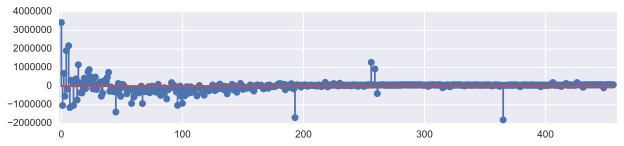

In [24]:
plt.figure(figsize=(10,2))
plt.stem(result.resid)
plt.xlim([-2, len(dfy)+2])
plt.show()

0값이 너무큼

In [25]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

0값을 아웃라이어로 의심

In [26]:
sm.graphics.influence_plot(result, plot_alpha=0.5)
plt.show()

In [32]:
plt.figure(figsize=(20, 2))
plt.stem(result.outlier_test().ix[:, -1])
plt.show()

????????????????????????????????????????????
왤까요????????????????????????????????

아웃라이어로 0, 35, 58 번을 제함.
제한 데이터로 다시 ols regression results 돌려봄

In [16]:
MovieData2 = pd.read_csv('moviedata_final4_1.csv')
movie2 = robust_scale(MovieData2[["director_score","act_score","pre_score","viewer_num","like_see", "screen1"]])
comp_score = MovieData2[["comp_score"]]


result2 = pd.DataFrame(np.vstack(movie2),columns=["director_score","act_score","pre_score","viewer_num","like_see", "screen1"])
#result2
data2 = pd.DataFrame(np.hstack([result2, comp_score]),columns=["director_score","act_score","pre_score","viewer_num","like_see", "screen1","comp_score"])
#data2.head()


dfy = MovieData2.week1_pop
dfX1 = data2[["director_score","act_score","viewer_num","like_see", "screen1","comp_score"]]

dfX = sm.add_constant(dfX1)
model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              week1_pop   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     313.7
Date:                Thu, 27 Oct 2016   Prob (F-statistic):          1.01e-156
Time:                        20:08:25   Log-Likelihood:                -6365.1
No. Observations:                 454   AIC:                         1.274e+04
Df Residuals:                     447   BIC:                         1.277e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.602e+04   1.64e+04     -2.

ㅇㅏ까보다 알스퀘어값도 오르고 자크베라도 값이줄었으나 정규성은 여전히 0




과최적화된걸로 의심 여기서 선형회귀를 포기하고 의사결정나무로 바꿈


데이터도 카테고리값을 (어떻게 )변형

In [41]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
df_movie = pd.read_csv('moviedata_final_classification8.csv')
df_movie.head(5)

week1_pop  comp1_score  comp2_score  rank1  rank2  rank3  rank4  cat1  \
0          1  105645636.0    2277708.0    0.0    0.0    1.0    0.0   1.0   
1          1   69620521.0          0.0    0.0    0.0    1.0    0.0   0.0   
2          1   88946120.0          0.0    0.0    0.0    1.0    0.0   0.0   
3          1   88946120.0   12983341.0    0.0    0.0    1.0    0.0   0.0   
4          1   88946120.0          0.0    0.0    0.0    1.0    0.0   1.0   

   cat2  cat3   ...     cat8  cat9  cat10  cat11  director_score  act_score  \
0   0.0   1.0   ...      0.0   0.0    0.0    0.0           178.0      505.0   
1   0.0   1.0   ...      0.0   0.0    0.0    0.0            93.0      402.0   
2   0.0   0.0   ...      1.0   0.0    0.0    0.0            88.0      396.0   
3   1.0   1.0   ...      0.0   0.0    0.0    0.0           316.0      588.0   
4   0.0   1.0   ...      0.0   0.0    0.0    0.0            93.0      368.0   

   pre_score  viewer_num  like_see  screen1  
0       8.63      1681.0   13639.0   1159.0  
1       8.22      5163.0   62952.0   1571.0  
2       8.99       748.0   46891.0   1268.0  
3       8.30       918.0   20846.0   1264.0  
4       9.27      1750.0   14319.0   1250.0  

[5 rows x 24 columns]

# 의사결정나무
* cross_validation


In [34]:
dfX = df_movie[["comp1_score","comp2_score","rank1","rank2","rank3","rank4","cat1","cat2","cat3","cat4","cat5","cat6","cat7","cat8","cat9","cat10","cat11","director_score","act_score","pre_score","viewer_num","like_see", "screen1"]]
dfy = df_movie.week1_pop
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX,dfy,test_size=0.25, random_state=1)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',max_depth=5).fit(X_train,y_train)
import pydot
import StringIO
from sklearn.tree import export_graphviz
from IPython.core.display import Image

command_buf = StringIO.StringIO() 
export_graphviz(model, out_file=command_buf, feature_names=["comp1_score","comp2_score","rank1","rank2","rank3","rank4","cat1","cat2","cat3","cat4","cat5","cat6","cat7","cat8","cat9","cat10","cat11","director_score","act_score","pre_score","viewer_num","like_see", "screen1"]) 
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0] 
image = graph.create_png()
image_buf = StringIO.StringIO() 
image_buf.write(image)
Image(image_buf.getvalue())

/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, model.predict(X_train))

array([[79,  0,  0,  0],
       [ 6, 70,  2,  1],
       [ 0,  0, 60, 10],
       [ 1,  0, 10, 67]])

In [36]:
confusion_matrix(y_test, model.predict(X_test))

array([[21,  2,  0,  0],
       [ 0, 19,  4,  0],
       [ 0,  4, 19,  9],
       [ 0,  1,  5, 18]])

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          1       0.92      1.00      0.96        79
          2       1.00      0.89      0.94        79
          3       0.83      0.86      0.85        70
          4       0.86      0.86      0.86        78

avg / total       0.90      0.90      0.90       306



In [38]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          1       1.00      0.91      0.95        23
          2       0.73      0.83      0.78        23
          3       0.68      0.59      0.63        32
          4       0.67      0.75      0.71        24

avg / total       0.76      0.75      0.75       102



# 결과


오버피팅 을 어떻게 해결해 나아가야할지 모르겠어어......
앞으로 개선할거/..?
차원축소를 통해서 데이터 정규성을 살려보는게 .... 0.05이상 띄게하는거..!!

오버피팅을 풀고나서 테스트셋 돌려야..할듯한데...